install required libraries from requirements.txt

`pip install -r requirements.txt`


downlod dataset --> https://urbansounddataset.weebly.com/download-urbansound8k.html 


In [1]:
# dataset files structue
#       .
#       ├── audio
#       │   ├── fold1
#       │   ├── fold10
#       │   ├── fold2
#       │   ├── fold3
#       │   ├── fold4
#       │   ├── fold5
#       │   ├── fold6
#       │   ├── fold7
#       │   ├── fold8
#       │   └── fold9
#       │       
#       ├── datasetFileStructure.txt
#       ├── FREESOUNDCREDITS.txt
#       ├── metadata
#       │   └── UrbanSound8K.csv
#       └── UrbanSound8K_README.txt

#       12 directories, 8736 files


In [2]:
# unique classes 
audio_classes = [ 'air_conditioner', 'car_horn', 
'children_playing', 'dog_bark', 'drilling', 
'engine_idling', 'gun_shot', 'jackhammer', 
'siren', 'street_music']

In [3]:
# audio file save format: format: [fsID]-[classID]-[occurrenceID]-[sliceID].wav  

In [4]:
# audio files meta-data dataset 
FILE_PATH = 'UrbanSound8K/metadata/UrbanSound8K.csv' 

import pandas as pd
data = pd.read_csv(FILE_PATH)
data.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


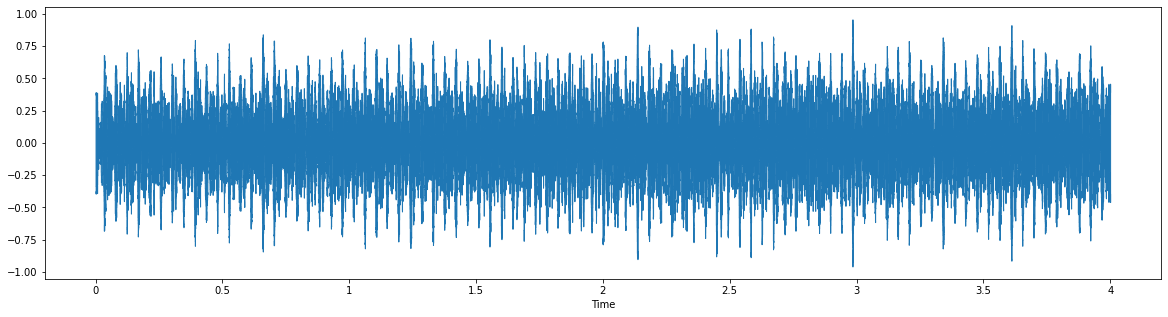

In [5]:
# file path of audio sample 
AUDIO_PATH = 'UrbanSound8K/audio/fold3/6988-5-0-2.wav'

# import relevant libraries
import librosa
import IPython
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

#set display 
plt.figure(figsize=(20,5))

# load audio data
data, sample_rate = librosa.load(AUDIO_PATH)
librosa.display.waveshow(data, sr=sample_rate)
plt.show()

# read and diplay audio data
# ipd.Audio(AUDIO_PATH)

In [6]:
import warnings
warnings.filterwarnings(action='ignore')

In [7]:
from playsound import playsound
playsound(AUDIO_PATH)

playsound is relying on another python subprocess. Please use `pip install pygobject` if you want playsound to run more efficiently.


In [8]:
sample_rate

22050

In [11]:
# MFCC (Mel-Frequency Cepstral Coefficients)
# n_mfcc --> mfcc dimensions
mfcc = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
print(mfcc.shape)

(40, 173)


In [12]:
mfcc

array([[-1.23260979e+02, -1.24043762e+02, -1.22629959e+02, ...,
        -1.11468277e+02, -1.01977905e+02, -8.15139313e+01],
       [ 1.25631363e+02,  1.41405792e+02,  1.48934219e+02, ...,
         1.69106415e+02,  1.45234299e+02,  1.21966583e+02],
       [-1.53699169e+01, -2.75663109e+01, -3.65741272e+01, ...,
        -3.69452972e+01, -2.25026741e+01, -2.95743561e+00],
       ...,
       [ 5.20485306e+00,  7.64669371e+00,  6.67136049e+00, ...,
         1.77550387e+00,  2.98228455e+00,  2.86447096e+00],
       [ 3.60798883e+00,  3.93379521e+00,  5.18288136e+00, ...,
         1.12385303e-01, -7.01901436e-01,  1.15544498e+00],
       [ 6.90789986e+00,  3.71446276e+00,  6.75974035e+00, ...,
        -1.44235671e+00,  2.24840713e+00,  3.07237482e+00]], dtype=float32)

# preprocessing steps
- load audio and get audio-data vector and samle rate
- extract features using MFCC with a test dimension of 40-50
- scale the MFCC features with `np.mean(mfcc_feature.T, axis=0)` --> `.T` is to transpose to one dimentional vector at `axis=0` 